In [1]:
import pandas as pd
import numpy as np
from global_vars import GLOBAL_PATH, DATA_PATH, get_numeric

In [2]:
cars = pd.read_csv(f'{DATA_PATH}cars.csv')

In [3]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


 # Subconjuntos

In [4]:
variables_numericas = ['Make'] + get_numeric(cars)

In [5]:
cars2 = cars.copy()[variables_numericas]

In [6]:
cars2['Is Familiar'] = np.where(cars['Number of Doors'] > 2, 'Familar', 'Sportage')
cars2.sample(15)

,Make,Engine HP,Engine Cylinders,Number of Doors,Is Familiar
8366,Aston Martin,550.0,12.0,4.0,Familar
2007,Porsche,265.0,6.0,2.0,Sportage
10164,Toyota,190.0,6.0,2.0,Sportage
11062,Toyota,381.0,8.0,4.0,Familar
9529,Chevrolet,355.0,8.0,4.0,Familar
11533,BMW,445.0,8.0,4.0,Familar
3309,Oldsmobile,160.0,4.0,2.0,Sportage
2834,Plymouth,136.0,4.0,4.0,Familar
6574,Mercedes-Benz,402.0,8.0,4.0,Familar
5311,Mercedes-Benz,577.0,8.0,4.0,Familar


In [7]:
cars2['Is Sport2'] = [1 if x == 'Sportage' else 0 for x in cars2['Is Familiar']]

In [8]:
cars2['Is Sport'] = cars2['Is Familiar'].apply(lambda x: 1 if x == 'Sportage' else 0)
cars2.sample(15)

,Make,Engine HP,Engine Cylinders,Number of Doors,Is Familiar,Is Sport2,Is Sport
3043,Honda,185.0,4.0,4.0,Familar,0,0
11177,Aston Martin,430.0,8.0,2.0,Sportage,1,1
4332,Ford,365.0,6.0,4.0,Familar,0,0
6830,Mitsubishi,74.0,3.0,4.0,Familar,0,0
6544,Buick,227.0,6.0,4.0,Familar,0,0
4742,Toyota,260.0,6.0,4.0,Familar,0,0
3650,Ford,200.0,6.0,3.0,Familar,0,0
1044,Audi,170.0,4.0,4.0,Familar,0,0
1999,Kia,337.0,8.0,4.0,Familar,0,0
4608,Ford,220.0,8.0,3.0,Familar,0,0


In [31]:
cars2.loc[(cars2['Make']=='BMW') & (cars2['Number of Doors'] > 2)][['Make', 'Number of Doors']].groupby('Make').count()

,Number of Doors
Make,
BMW,194


In [8]:
for cars in cars2:
    print(cars)

Make
Engine HP
Engine Cylinders
Number of Doors
Is Familiar


In [26]:
random_df = pd.DataFrame({'Col1': [i for i in range(1,101)], 'Col2': np.random.normal(size=100)})

In [28]:
random_df['Col3'] = random_df['Col1']*random_df['Col2']

In [29]:
random_df.head()

,Col1,Col2,Col3
0,1,0.071567,0.071567
1,2,-0.228819,-0.457638
2,3,-0.400737,-1.202210
3,4,-0.429523,-1.718093
4,5,1.981726,9.908629


In [31]:
random_df['Is Big1'] = [1 if abs(x)>20 else 0 for x in random_df['Col3']]

In [32]:
random_df['Is Big2'] = random_df['Col3'].apply(lambda x: 1 if abs(x)>20 else 0)

In [33]:
random_df.head()

,Col1,Col2,Col3,Is Big1,Is Big2
0,1,0.071567,0.071567,0,0
1,2,-0.228819,-0.457638,0,0
2,3,-0.400737,-1.202210,0,0
3,4,-0.429523,-1.718093,0,0
4,5,1.981726,9.908629,0,0


## Trabajar con dataframes

In [9]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [22]:
def cols_select(data, cols):
    return data[cols]

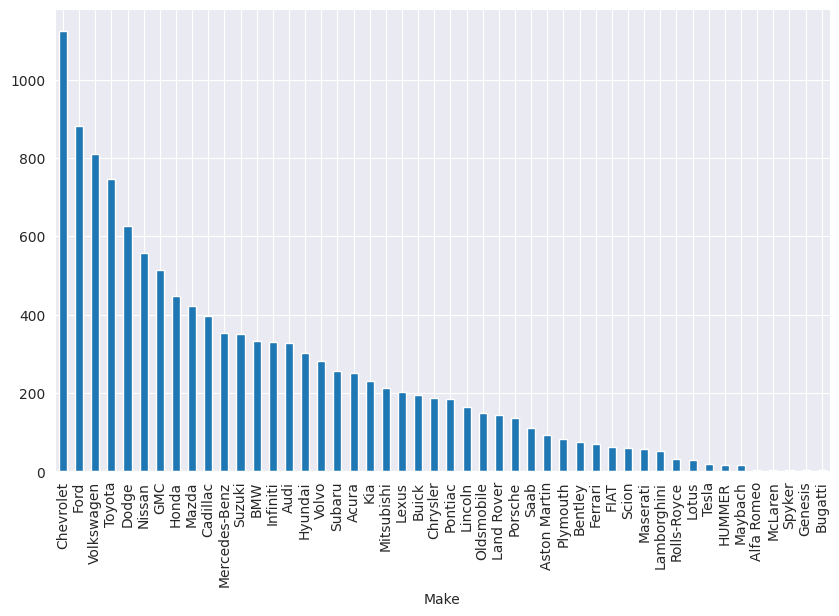

In [31]:
import matplotlib.pyplot as plt
cars['Make'].value_counts().plot(kind='bar', figsize=(10,6))
plt.show()